In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 경고(W) 메시지만 숨김

In [2]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import tensorflow as tf

# GPU 메모리 동적 할당 설정
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU 메모리 동적 할당 활성화 완료")
    except RuntimeError as e:
        print(e)

GPU 메모리 동적 할당 활성화 완료


In [3]:
tf.config.set_visible_devices([], 'GPU')

In [24]:
import pandas as pd

# KOTE 데이터셋 로드
train_df = pd.read_csv("KOTE/train.tsv", sep='\t')
test_df = pd.read_csv("KOTE/test.tsv", sep='\t')
val_df = pd.read_csv("KOTE/val.tsv", sep='\t')

# 데이터 확인
print(f"Train 데이터 크기: {train_df.shape}")
print(f"Test 데이터 크기: {test_df.shape}")
print(f"Validation 데이터 크기: {val_df.shape}")

# 데이터 샘플 출력
train_df.head()

Train 데이터 크기: (39999, 3)
Test 데이터 크기: (4999, 3)
Validation 데이터 크기: (4999, 3)


,39087,내가 톰행크스를 좋아하긴 했나보다... 초기 영화 빼고는 다 봤네.,"2,13,15,16,29,39"
0,30893,"정말 상상을 초월하는 무개념 진상들 상대하다 우울증, 공항장애 걸리는 공무원 많아요...","0,5,7,10,19,22,29,35,36,38"
1,45278,"새로운 세상과 조우한 자의 어린아이 같은 반응, 어쩌면 회복된 것은 눈이 아닌 순수...","1,2,7"
2,16398,미역은 원생생물계 산호초는 동물ㅇㅇ 아 미역이 바다의 새ㄱㅇㄱㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,"9,15,20,23,26,28,29"
3,13653,네 맞습니다 플스는 역시 30프레임이 어울리죠 ㅎ,"1,2,8,9,11,13,15,16,28,29,32,40,42"
4,13748,어릴 때 했던 건데 아직도 볼 때마다 뒤통수 얼얼함 ㅋㅋㅋㅋ,"2,15,23,24,25,28,33"


In [25]:
import pandas as pd

# 올바른 컬럼명 지정 후 데이터 로드
train_df = pd.read_csv("KOTE/train.tsv", sep='\t', names=['id', 'comments', 'labels'], header=None)
test_df = pd.read_csv("KOTE/test.tsv", sep='\t', names=['id', 'comments', 'labels'], header=None)
val_df = pd.read_csv("KOTE/val.tsv", sep='\t', names=['id', 'comments', 'labels'], header=None)

# 데이터 확인
print(train_df.head())
print("📌 데이터 컬럼 목록:", train_df.columns)

      id                                           comments  \
0  39087              내가 톰행크스를 좋아하긴 했나보다... 초기 영화 빼고는 다 봤네.   
1  30893  정말 상상을 초월하는 무개념 진상들 상대하다 우울증, 공항장애 걸리는 공무원 많아요...   
2  45278  새로운 세상과 조우한 자의 어린아이 같은 반응, 어쩌면 회복된 것은 눈이 아닌 순수...   
3  16398       미역은 원생생물계 산호초는 동물ㅇㅇ 아 미역이 바다의 새ㄱㅇㄱㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ   
4  13653                        네 맞습니다 플스는 역시 30프레임이 어울리죠 ㅎ   

                               labels  
0                    2,13,15,16,29,39  
1          0,5,7,10,19,22,29,35,36,38  
2                               1,2,7  
3                 9,15,20,23,26,28,29  
4  1,2,8,9,11,13,15,16,28,29,32,40,42  
📌 데이터 컬럼 목록: Index(['id', 'comments', 'labels'], dtype='object')


In [26]:
import re

# 텍스트 정제 함수 (숫자 유지)
def clean_text(text):
    text = re.sub(r"[^가-힣ㄱ-ㅎㅏ-ㅣ0-9\s]", "", text)  # 한글, 숫자, 공백 제외한 문자 제거
    text = re.sub(r"\s+", " ", text).strip()  # 연속된 공백 제거
    return text

# 데이터 정제 적용
train_df['clean_text'] = train_df['comments'].apply(clean_text)
test_df['clean_text'] = test_df['comments'].apply(clean_text)
val_df['clean_text'] = val_df['comments'].apply(clean_text)

# 결과 확인
train_df[['comments', 'clean_text']].head(10)

,comments,clean_text
0,내가 톰행크스를 좋아하긴 했나보다... 초기 영화 빼고는 다 봤네.,내가 톰행크스를 좋아하긴 했나보다 초기 영화 빼고는 다 봤네
1,"정말 상상을 초월하는 무개념 진상들 상대하다 우울증, 공항장애 걸리는 공무원 많아요...",정말 상상을 초월하는 무개념 진상들 상대하다 우울증 공항장애 걸리는 공무원 많아요 ...
2,"새로운 세상과 조우한 자의 어린아이 같은 반응, 어쩌면 회복된 것은 눈이 아닌 순수...",새로운 세상과 조우한 자의 어린아이 같은 반응 어쩌면 회복된 것은 눈이 아닌 순수함...
3,미역은 원생생물계 산호초는 동물ㅇㅇ 아 미역이 바다의 새ㄱㅇㄱㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,미역은 원생생물계 산호초는 동물ㅇㅇ 아 미역이 바다의 새ㄱㅇㄱㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
4,네 맞습니다 플스는 역시 30프레임이 어울리죠 ㅎ,네 맞습니다 플스는 역시 30프레임이 어울리죠 ㅎ
5,어릴 때 했던 건데 아직도 볼 때마다 뒤통수 얼얼함 ㅋㅋㅋㅋ,어릴 때 했던 건데 아직도 볼 때마다 뒤통수 얼얼함 ㅋㅋㅋㅋ
6,물갈이약 구매했어요...미미네에서 수조2개랑 여러가지 용품사면서 3~4번 주문했었는...,물갈이약 구매했어요미미네에서 수조2개랑 여러가지 용품사면서 34번 주문했었는데 그 ...
7,"십일조는 겨우60인데? 나머지 다 어디감? 혹시 엄마아빠 그랜져따로타고, 외식자주하...",십일조는 겨우60인데 나머지 다 어디감 혹시 엄마아빠 그랜져따로타고 외식자주하는거아...
8,90년 줘야 하는거 아닌가? 쓰레기같은 것들.,90년 줘야 하는거 아닌가 쓰레기같은 것들
9,아주 부착성도 좋고 효과 100점 입니다,아주 부착성도 좋고 효과 100점 입니다


In [27]:
# ✅ 텍스트 데이터셋 로드
train_texts = train_df['clean_text'].tolist()
test_texts = test_df['clean_text'].tolist()
val_texts = val_df['clean_text'].tolist()

In [8]:
# 감정 라벨 개수 확인
print(train_df['labels'].value_counts())

labels
0,6,10,22,23,33                       125
0,6,10,12,22,23,33                    108
24                                     83
2,28,40,42                             65
0,10,22,37                             55
                                     ... 
0,3,10,12,20,21,22,23,24,27,31,35       1
0,5,10,19,20,22,25,27,31,36,38          1
0,2,3,8,20,22,23,24,28,29,32,33,39      1
1,11,14,15,16,27,29,38,39,41            1
2,9,10,15,18,23,33,35,39                1
Name: count, Length: 29332, dtype: int64


In [28]:
import pandas as pd
from collections import Counter

# 감정을 7개 그룹으로 정리하는 매핑 (KOTE의 44개 감정을 7개 감정 그룹으로 변환)
emotion_mapping = {
    '기쁨': [42, 40, 28],  # 기쁨, 행복, 즐거움/신남
    '슬픔': [5, 19, 25, 36],  # 슬픔, 절망, 패배/자기혐오, 서러움
    '놀람': [39, 34, 15, 2],  # 놀람, 경악, 신기함/관심, 감동/감탄
    '분노': [6, 22, 0],  # 화남/분노, 짜증, 불평/불만
    '공포': [18, 41],  # 공포/무서움, 불안/걱정
    '혐오': [31, 21],  # 증오/혐오, 역겨움/징그러움
    '중립': [24, 14, 43]  # 없음, 편안/쾌적, 안심/신뢰
}

# FER2013 기준 감정 라벨로 변환
fer2013_label_mapping = {
    '기쁨': 3,  # Happy
    '슬픔': 5,  # Sad 
    '놀람': 6,  # Surprise
    '분노': 0,  # Angry
    '공포': 2,  # Fear
    '혐오': 1,  # Disgust
    '중립': 4   # Neutral
}

# 감정 그룹을 FER2013 기준으로 매핑하는 함수
def map_to_fer2013(label_str):
    if pd.isna(label_str) or label_str == '':
        return 4  # FER2013 기준 중립

    label_list = list(map(int, label_str.split(',')))
    matched_fer_labels = []

    for num in label_list:
        for kotem, kote_ids in emotion_mapping.items():
            if num in kote_ids:
                matched_fer_labels.append(fer2013_label_mapping[kotem])

    if not matched_fer_labels:
        return 4  # 아무것도 매핑되지 않으면 중립

    # 가장 많이 등장한 FER2013 감정을 선택
    return Counter(matched_fer_labels).most_common(1)[0][0]

# 감정 라벨 변환 적용 (NaN 값 처리 추가)
train_df['fer2013_emotion_grouped'] = train_df['labels'].fillna('').apply(map_to_fer2013)
test_df['fer2013_emotion_grouped'] = test_df['labels'].fillna('').apply(map_to_fer2013)
val_df['fer2013_emotion_grouped'] = val_df['labels'].fillna('').apply(map_to_fer2013)

# 변환된 감정 개수 확인
print(train_df['fer2013_emotion_grouped'].value_counts())

fer2013_emotion_grouped
0    16762
6     8879
3     6499
4     4150
5     2588
2      776
1      346
Name: count, dtype: int64


In [29]:
# ✅ 감정 라벨 (FER2013 매핑된 라벨)
train_labels = train_df['fer2013_emotion_grouped'].values
test_labels = test_df['fer2013_emotion_grouped'].values
val_labels = val_df['fer2013_emotion_grouped'].values

# 변환된 라벨 확인
print("라벨 변환 결과:", train_labels[:5])

라벨 변환 결과: [6 5 6 6 3]


In [30]:
!mecab -D

filename:	/opt/homebrew/lib/mecab/dic/mecab-ko-dic/sys.dic
version:	102
charset:	UTF-8
type:	0
size:	816283
left size:	3822
right size:	2693



In [31]:
import os
os.environ["MECABRC"] = "/opt/homebrew/etc/mecabrc"

In [32]:
from konlpy.tag import Mecab

# 버전 비의존적 경로 사용
mecab = Mecab(dicpath='/opt/homebrew/lib/mecab/dic/mecab-ko-dic')

print(mecab.morphs("이 문장은 형태소 분석을 테스트하는 문장입니다."))

['이', '문장', '은', '형태소', '분석', '을', '테스트', '하', '는', '문장', '입니다', '.']


In [33]:
from konlpy.tag import Mecab

mecab = Mecab(dicpath='/opt/homebrew/Cellar/mecab-ko-dic/2.1.1-20180720/lib/mecab/dic/mecab-ko-dic')

# 토큰화 함수
def tokenize(text):
    return mecab.morphs(text)

# 토큰화 적용
train_df['tokenized'] = train_df['clean_text'].apply(tokenize)
test_df['tokenized'] = test_df['clean_text'].apply(tokenize)
val_df['tokenized'] = val_df['clean_text'].apply(tokenize)

# 결과 확인
print(train_df[['clean_text', 'tokenized']].head())

                                          clean_text  \
0                  내가 톰행크스를 좋아하긴 했나보다 초기 영화 빼고는 다 봤네   
1  정말 상상을 초월하는 무개념 진상들 상대하다 우울증 공항장애 걸리는 공무원 많아요 ...   
2  새로운 세상과 조우한 자의 어린아이 같은 반응 어쩌면 회복된 것은 눈이 아닌 순수함...   
3       미역은 원생생물계 산호초는 동물ㅇㅇ 아 미역이 바다의 새ㄱㅇㄱㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ   
4                        네 맞습니다 플스는 역시 30프레임이 어울리죠 ㅎ   

                                           tokenized  
0  [내, 가, 톰행크스, 를, 좋아하, 긴, 했, 나, 보다, 초기, 영화, 빼, 고...  
1  [정말, 상상, 을, 초월, 하, 는, 무, 개념, 진상, 들, 상대, 하, 다, ...  
2  [새로운, 세상, 과, 조우, 한, 자, 의, 어린아이, 같, 은, 반응, 어쩌면,...  
3  [미역, 은, 원생생물, 계, 산호초, 는, 동물, ㅇㅇ, 아, 미역, 이, 바다,...  
4    [네, 맞, 습니다, 플, 스, 는, 역시, 30, 프레임, 이, 어울리, 죠, ㅎ]  


In [34]:
# 불용어 리스트
stopwords = [
    "의", "가", "이", "은", "들", "는", "걍", "과",
    "를", "으로", "자", "에", "와", "한", "하다", "에서",
    "요", "무엇", "어디", "하면", "이다"
]

# 불용어 제거 함수
def remove_stopwords(tokens):
    return [token for token in tokens if token not in stopwords]

# 불용어 제거 적용
train_df['tokenized'] = train_df['tokenized'].apply(remove_stopwords)
test_df['tokenized'] = test_df['tokenized'].apply(remove_stopwords)
val_df['tokenized'] = val_df['tokenized'].apply(remove_stopwords)

# 결과 확인
print(train_df[['clean_text', 'tokenized']].head())

                                          clean_text  \
0                  내가 톰행크스를 좋아하긴 했나보다 초기 영화 빼고는 다 봤네   
1  정말 상상을 초월하는 무개념 진상들 상대하다 우울증 공항장애 걸리는 공무원 많아요 ...   
2  새로운 세상과 조우한 자의 어린아이 같은 반응 어쩌면 회복된 것은 눈이 아닌 순수함...   
3       미역은 원생생물계 산호초는 동물ㅇㅇ 아 미역이 바다의 새ㄱㅇㄱㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ   
4                        네 맞습니다 플스는 역시 30프레임이 어울리죠 ㅎ   

                                           tokenized  
0  [내, 톰행크스, 좋아하, 긴, 했, 나, 보다, 초기, 영화, 빼, 고, 다, 봤...  
1  [정말, 상상, 을, 초월, 하, 무, 개념, 진상, 상대, 하, 다, 우울증, 공...  
2  [새로운, 세상, 조우, 어린아이, 같, 반응, 어쩌면, 회복, 된, 것, 눈, 아...  
3  [미역, 원생생물, 계, 산호초, 동물, ㅇㅇ, 아, 미역, 바다, 새, ㄱ, ㅇㄱ...  
4          [네, 맞, 습니다, 플, 스, 역시, 30, 프레임, 어울리, 죠, ㅎ]  


In [35]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_texts = train_df['tokenized'].apply(lambda x: ' '.join(x)).tolist()
test_texts = test_df['tokenized'].apply(lambda x: ' '.join(x)).tolist()
val_texts = val_df['tokenized'].apply(lambda x: ' '.join(x)).tolist()

# 단어 사전 생성
tokenizer = Tokenizer(oov_token="<OOV>",
                      filters=''
                     )
custom_tokens = [
    "ㅋㅋㅋ", "ㅎㅎㅎ", "ㅠㅠ", "ㅜㅜ", "ㅡㅡ", "헐", "헉", "ㄷㄷ", "대박",
    "ㄹㅇ", "ㄴㄴ", "ㅇㅇ", "ㅇㅋ", "ㄱㄱ", "ㄱㅅ", "ㅊㅋ", "ㅅㄱ", "ㅎㅇ", "ㅂㅇ", "ㅇㅈ",
    "노잼", "꿀잼", "갑분싸", "잼민이", "현웃", "만렙", "어그로", "불금", "ㄹㅈㄷ", "쩐다", "존맛", "솔까", "극혐",
    "ㅅㅂ", "ㅈㄹ", "ㅄ", "존나"
]
tokenizer.fit_on_texts(train_texts + [" ".join(custom_tokens)])

# ✅ 이제 VOCAB_SIZE 설정 (정확한 사전 크기 기반)
MAX_VOCAB_SIZE = len(tokenizer.word_index) + 1

# 단어를 숫자로 변환
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)
val_sequences = tokenizer.texts_to_sequences(val_texts)

# ✅ 텍스트 토큰화 및 패딩
MAX_SEQUENCE_LENGTH = max(len(seq) for seq in train_sequences)

# 최대 문장 길이 설정 (패딩)
train_padded = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
val_padded = pad_sequences(val_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

# ✅ TensorFlow 데이터셋 변환
BATCH_SIZE = 64

train_text_ds = tf.data.Dataset.from_tensor_slices((train_padded, train_labels)).batch(BATCH_SIZE,drop_remainder=False).prefetch(tf.data.AUTOTUNE)
test_text_ds = tf.data.Dataset.from_tensor_slices((test_padded, test_labels)).batch(BATCH_SIZE,drop_remainder=False).prefetch(tf.data.AUTOTUNE)
val_text_ds = tf.data.Dataset.from_tensor_slices((val_padded, val_labels)).batch(BATCH_SIZE,drop_remainder=False).prefetch(tf.data.AUTOTUNE)

# 결과 확인
print("패딩 후 데이터 크기:", train_padded.shape)
print("✅ 텍스트 데이터셋 준비 완료!")

패딩 후 데이터 크기: (40000, 188)
✅ 텍스트 데이터셋 준비 완료!


In [36]:
import numpy as np

# 넘파이 배열 변환 
X_train, y_train = np.array(train_padded), np.array(train_labels)
X_val, y_val = np.array(val_padded), np.array(val_labels)
X_test, y_test = np.array(test_padded), np.array(test_labels)

print("훈련 데이터 크기:", X_train.shape, y_train.shape) 
print("검증 데이터 크기:", X_val.shape, y_val.shape)
print("테스트 데이터 크기:", X_test.shape, y_test.shape)

훈련 데이터 크기: (40000, 188) (40000,)
검증 데이터 크기: (5000, 188) (5000,)
테스트 데이터 크기: (5000, 188) (5000,)


In [37]:
# ✅ 데이터 개수 확인
text_train_count = sum(1 for _ in train_text_ds)
text_val_count = sum(1 for _ in val_text_ds)
text_test_count = sum(1 for _ in test_text_ds)

print(f"📝 텍스트 데이터 개수 - Train: {text_train_count}, Validation: {text_val_count}, Test: {text_test_count}")

📝 텍스트 데이터 개수 - Train: 625, Validation: 79, Test: 79


In [38]:
for x, y in train_text_ds.take(1):
    print("입력 데이터 형태:", x.shape)
    print("라벨 데이터 형태:", y.shape)

입력 데이터 형태: (64, 188)
라벨 데이터 형태: (64,)


In [39]:
from tensorflow.keras.layers import Layer, Dense, Dropout
import tensorflow.keras.backend as K
import tensorflow as tf

class AttentionLayer(Layer):
    def __init__(self, dropout_rate=0.1, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)
        self.dropout = Dropout(dropout_rate)

    def build(self, input_shape):
        self.W = Dense(input_shape[-1], activation='tanh')
        self.V = Dense(1)
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs, mask=None):
        # (batch, time, 1)
        score = self.V(self.W(inputs))

        # ✅ 마스킹 적용 (패딩된 부분을 attention에서 제외)
        if mask is not None:
            mask = tf.cast(mask, tf.float32)          # (batch, time)
            mask = tf.expand_dims(mask, axis=-1)      # (batch, time, 1)
            score -= (1.0 - mask) * 1e9                # 매우 작은 값으로 억제

        attention_weights = K.softmax(score, axis=1)  # (batch, time, 1)
        attention_weights = self.dropout(attention_weights)  # ✅ 드롭아웃 적용
        context_vector = attention_weights * inputs
        context_vector = K.sum(context_vector, axis=1)  # (batch, features)
        return context_vector

    def compute_mask(self, inputs, mask=None):
        return None  # 출력에는 마스크 적용하지 않음

In [40]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, Conv1D, BatchNormalization, LSTM, Bidirectional, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 하이퍼파라미터 기본 설정
MAX_VOCAB_SIZE = len(tokenizer.word_index) + 1   # 어휘 사전 크기
EMBEDDING_DIM = 300       # 줄인 임베딩 차원
MAX_SEQUENCE_LENGTH = 98 # 문장 최대 길이

# 1. 모델 생성 함수 정의 (간소화된 CNN + Bi-LSTM 구조)
def create_model(num_filters=64, kernel_size=3, lstm_units=128, dropout_rate=0.3, learning_rate=0.00023853):
    model = Sequential()
    # 입력 모양 명시
    model.add(Input(shape=(MAX_SEQUENCE_LENGTH,)))
    # 임베딩 레이어 (input_length 제거)
    model.add(Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=EMBEDDING_DIM, mask_zero=True))
    
    # CNN 레이어: 필터 수를 32로 줄임
    model.add(Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu', padding='same'))
    model.add(BatchNormalization())
    
    # 단일 Bidirectional LSTM 레이어 사용 (출력 시퀀스 대신 최종 출력만 사용)
    model.add(Bidirectional(LSTM(lstm_units, return_sequences=True)))

    #🔑Attention 메커니즘 추가
    model.add(AttentionLayer())

    # ✅ AttentionLayer 제거 시 처리 필요
    #model.add(tf.keras.layers.GlobalAveragePooling1D())  # 🔑 시퀀스 제거 (중요)
    
    # 드롭아웃 및 Dense 레이어
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(7, activation='softmax'))  # 7개의 감정 클래스

    # 옵티마이저 설정 (Adam)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, clipnorm=1.0) # clipnorm 추가 (accuracy 급락 방지)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# 예시로 모델 생성 및 요약 출력
model = create_model(num_filters=64, kernel_size=3, lstm_units=128, dropout_rate=0.3,
                     learning_rate=0.00023853)
model.summary()

/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/keras/src/layers/layer.py:939: UserWarning: Layer 'conv1d_1' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 98, 300)        │    12,642,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 98, 64)         │        57,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 98, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 98, 256)        │       197,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_layer_1               │ (None, 256)            │        66,049 │
│ (AttentionLayer)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,980,504 (49.52 MB)

 Trainable params: 12,980,376 (49.52 MB)

 Non-trainable params: 128 (512.00 B)

/var/folders/c1/ff1kv08j2fd06b_058sckl9w0000gn/T/ipykernel_12265/1084822427.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_classes, y=counts, palette='Blues_d')
/var/folders/c1/ff1kv08j2fd06b_058sckl9w0000gn/T/ipykernel_12265/1084822427.py:15: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


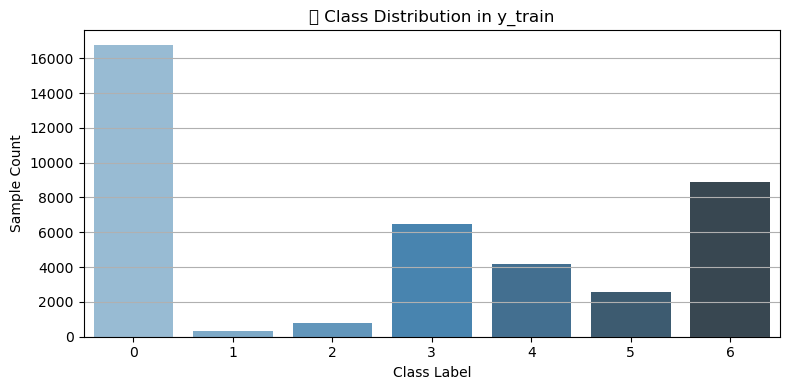

Class 0: 16762개 (41.91%)
Class 1: 346개 (0.86%)
Class 2: 776개 (1.94%)
Class 3: 6499개 (16.25%)
Class 4: 4150개 (10.38%)
Class 5: 2588개 (6.47%)
Class 6: 8879개 (22.20%)


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 클래스 분포 시각화
unique_classes, counts = np.unique(y_train, return_counts=True)

plt.figure(figsize=(8, 4))
sns.barplot(x=unique_classes, y=counts, palette='Blues_d')
plt.title("🔍 Class Distribution in y_train")
plt.xlabel("Class Label")
plt.ylabel("Sample Count")
plt.xticks(unique_classes)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 클래스별 비율 출력
for label, count in zip(unique_classes, counts):
    print(f"Class {label}: {count}개 ({count / len(y_train) * 100:.2f}%)")

In [63]:
# 2. 미리 정해진(best) 하이퍼파라미터 설정 (Grid Search 없이 직접 지정)
from sklearn.utils import class_weight

# 클래스 가중치 계산
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# 가중치 제한 (너무 큰 가중치 방지)
max_weight_limit = 7   # 10에서 변경 
adjusted_weights = np.clip(class_weights, 0, max_weight_limit)

class_weights_dict = dict(enumerate(adjusted_weights))

best_params = {
    'num_filters': 64, # 높을수록 과적합 32에서 변경
    'kernel_size': 3, # 고정
    'lstm_units': 128,  # 높을수록 과적합
    'dropout_rate': 0.3, 
    'learning_rate': 0.0003, 
    'epochs': 50, # 고정
    'batch_size': 64 # 높을수록 과적합 64에서 변경
}

# 3. 앙상블 학습: 동일한 하이퍼파라미터로 여러 모델을 개별 학습시킴
ensemble_models = []
histories = []
n_ensemble = 7  # 사용할 모델 개수 5에서 변경

# 🔑 EarlyStopping 및 ReduceLROnPlateau 설정 추가
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

for i in range(n_ensemble):
    print(f"\n🔁 Training model {i+1}/{n_ensemble} (seed={42 + i})...")

    # ✅ seed 고정 (가중치 + 셔플 + NumPy 일관성)
    tf.keras.utils.set_random_seed(42 + i)
    
    model = create_model(num_filters=best_params['num_filters'],
                         kernel_size=best_params['kernel_size'],
                         lstm_units=best_params['lstm_units'],
                         dropout_rate=best_params['dropout_rate'],
                         learning_rate=best_params['learning_rate'])
    history = model.fit(X_train, y_train, 
                  epochs=best_params['epochs'], 
                  batch_size=best_params['batch_size'], 
                  validation_data = (X_val, y_val),
                  callbacks=[early_stop, lr_scheduler],
                  class_weight=class_weights_dict,
                  verbose=1
    )
    ensemble_models.append(model)
    histories.append(history)


🔁 Training model 1/7 (seed=42)...
Epoch 1/50


/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/keras/src/layers/layer.py:939: UserWarning: Layer 'conv1d_43' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 116ms/step - accuracy: 0.3327 - loss: 1.6813 - val_accuracy: 0.5344 - val_loss: 1.3719 - learning_rate: 3.0000e-04
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 117ms/step - accuracy: 0.5193 - loss: 1.3368 - val_accuracy: 0.4970 - val_loss: 1.4150 - learning_rate: 3.0000e-04
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.6472 - loss: 0.9126
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0001500000071246177.
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 117ms/step - accuracy: 0.6472 - loss: 0.9125 - val_accuracy: 0.4934 - val_loss: 1.4967 - learning_rate: 3.0000e-04
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - accuracy: 0.7766 - loss: 0.5206 - val_accuracy: 0.5050 - val_loss: 1.6440 - learning_rate: 1.5000e-04
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.8529 - loss: 0.3341
Epoch 5: ReduceLROnPlateau reducing learning rate to 7.500000356230885e-05.
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 117ms/step - accuracy: 0.

/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/keras/src/layers/layer.py:939: UserWarning: Layer 'conv1d_44' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 120ms/step - accuracy: 0.2557 - loss: 1.7194 - val_accuracy: 0.5222 - val_loss: 1.3410 - learning_rate: 3.0000e-04
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 119ms/step - accuracy: 0.4799 - loss: 1.3949 - val_accuracy: 0.5102 - val_loss: 1.3503 - learning_rate: 3.0000e-04
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.6269 - loss: 0.9699
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0001500000071246177.
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 119ms/step - accuracy: 0.6269 - loss: 0.9698 - val_accuracy: 0.4896 - val_loss: 1.4756 - learning_rate: 3.0000e-04
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 119ms/step - accuracy: 0.7611 - loss: 0.5734 - val_accuracy: 0.5544 - val_loss: 1.5116 - learning_rate: 1.5000e-04
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.8406 - loss: 0.3626
Epoch 5: ReduceLROnPlateau reducing learning rate to 7.500000356230885e-05.
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 120ms/step - accuracy: 0.

/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/keras/src/layers/layer.py:939: UserWarning: Layer 'conv1d_45' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 120ms/step - accuracy: 0.2739 - loss: 1.7044 - val_accuracy: 0.4492 - val_loss: 1.5268 - learning_rate: 3.0000e-04
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 123ms/step - accuracy: 0.4975 - loss: 1.3627 - val_accuracy: 0.4958 - val_loss: 1.3550 - learning_rate: 3.0000e-04
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 121ms/step - accuracy: 0.6308 - loss: 0.9528 - val_accuracy: 0.4680 - val_loss: 1.5184 - learning_rate: 3.0000e-04
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.7464 - loss: 0.5882
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0001500000071246177.
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 120ms/step - accuracy: 0.7465 - loss: 0.5881 - val_accuracy: 0.5278 - val_loss: 1.5509 - learning_rate: 3.0000e-04
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - accuracy: 0.8466 - loss: 0.3348 - val_accuracy: 0.5416 - val_loss: 1.7578 - learning_rate: 1.5000e-04
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accurac

/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/keras/src/layers/layer.py:939: UserWarning: Layer 'conv1d_46' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 117ms/step - accuracy: 0.2254 - loss: 1.7042 - val_accuracy: 0.5094 - val_loss: 1.5321 - learning_rate: 3.0000e-04
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 116ms/step - accuracy: 0.5032 - loss: 1.3415 - val_accuracy: 0.5258 - val_loss: 1.3671 - learning_rate: 3.0000e-04
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 117ms/step - accuracy: 0.6350 - loss: 0.9655 - val_accuracy: 0.5408 - val_loss: 1.5149 - learning_rate: 3.0000e-04
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.7641 - loss: 0.5837
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0001500000071246177.
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 119ms/step - accuracy: 0.7642 - loss: 0.5836 - val_accuracy: 0.5466 - val_loss: 1.6704 - learning_rate: 3.0000e-04
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 121ms/step - accuracy: 0.8587 - loss: 0.3353 - val_accuracy: 0.5564 - val_loss: 1.7933 - learning_rate: 1.5000e-04
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accurac

/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/keras/src/layers/layer.py:939: UserWarning: Layer 'conv1d_47' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 122ms/step - accuracy: 0.2097 - loss: 1.7430 - val_accuracy: 0.3728 - val_loss: 1.6051 - learning_rate: 3.0000e-04
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 122ms/step - accuracy: 0.4766 - loss: 1.4627 - val_accuracy: 0.4500 - val_loss: 1.4911 - learning_rate: 3.0000e-04
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 122ms/step - accuracy: 0.6123 - loss: 1.0789 - val_accuracy: 0.4798 - val_loss: 1.5109 - learning_rate: 3.0000e-04
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.7354 - loss: 0.7366
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0001500000071246177.
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 123ms/step - accuracy: 0.7354 - loss: 0.7364 - val_accuracy: 0.4942 - val_loss: 1.6606 - learning_rate: 3.0000e-04
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 129ms/step - accuracy: 0.8302 - loss: 0.4461 - val_accuracy: 0.5082 - val_loss: 1.7959 - learning_rate: 1.5000e-04
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accurac

/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/keras/src/layers/layer.py:939: UserWarning: Layer 'conv1d_48' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 135ms/step - accuracy: 0.3002 - loss: 1.6740 - val_accuracy: 0.4284 - val_loss: 1.5862 - learning_rate: 3.0000e-04
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 135ms/step - accuracy: 0.5318 - loss: 1.3131 - val_accuracy: 0.5054 - val_loss: 1.4004 - learning_rate: 3.0000e-04
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 136ms/step - accuracy: 0.6767 - loss: 0.8660 - val_accuracy: 0.4982 - val_loss: 1.5086 - learning_rate: 3.0000e-04
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.7946 - loss: 0.4902
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0001500000071246177.
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 136ms/step - accuracy: 0.7946 - loss: 0.4901 - val_accuracy: 0.4898 - val_loss: 1.7512 - learning_rate: 3.0000e-04
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 137ms/step - accuracy: 0.8796 - loss: 0.2703 - val_accuracy: 0.5372 - val_loss: 1.8588 - learning_rate: 1.5000e-04
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/ste

/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/keras/src/layers/layer.py:939: UserWarning: Layer 'conv1d_49' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 135ms/step - accuracy: 0.2586 - loss: 1.7056 - val_accuracy: 0.3044 - val_loss: 1.7824 - learning_rate: 3.0000e-04
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 135ms/step - accuracy: 0.5114 - loss: 1.3468 - val_accuracy: 0.4420 - val_loss: 1.5654 - learning_rate: 3.0000e-04
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 134ms/step - accuracy: 0.6406 - loss: 0.9119 - val_accuracy: 0.5102 - val_loss: 1.4751 - learning_rate: 3.0000e-04
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 136ms/step - accuracy: 0.7642 - loss: 0.5473 - val_accuracy: 0.5214 - val_loss: 1.6432 - learning_rate: 3.0000e-04
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.8586 - loss: 0.3250
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0001500000071246177.
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 137ms/step - accuracy: 0.8586 - loss: 0.3250 - val_accuracy: 0.4912 - val_loss: 2.1140 - learning_rate: 3.0000e-04
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 138ms/st

In [64]:
# 앙상블 학습 후, ensemble_models와 histories 리스트에 각 모델과 해당 history가 저장되어 있다고 가정합니다.
best_val_acc = 0.0
best_model_index = None

for i, history in enumerate(histories):
    # 각 모델의 검증 정확도의 최대값을 가져옵니다.
    current_max_val_acc = max(history.history['val_accuracy'])
    print(f"모델 {i+1}: 최고 검증 정확도 = {current_max_val_acc:.4f}")
    if current_max_val_acc > best_val_acc:
        best_val_acc = current_max_val_acc
        best_model_index = i

best_text_model = ensemble_models[best_model_index]
print(f"\n선택된 모델: 모델 {best_model_index+1} (검증 정확도: {best_val_acc:.4f})")

모델 1: 최고 검증 정확도 = 0.5344
모델 2: 최고 검증 정확도 = 0.5544
모델 3: 최고 검증 정확도 = 0.5428
모델 4: 최고 검증 정확도 = 0.5564
모델 5: 최고 검증 정확도 = 0.5082
모델 6: 최고 검증 정확도 = 0.5372
모델 7: 최고 검증 정확도 = 0.5350

선택된 모델: 모델 4 (검증 정확도: 0.5564)


In [65]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 4. 앙상블 예측 함수: 각 모델의 예측 결과를 평균내어 최종 클래스를 결정
def ensemble_predict(models, X):
    predictions = [model.predict(X, batch_size=64) for model in models]  # ✅ 동일한 배치 크기 명시 64
    avg_predictions = np.mean(predictions, axis=0)
    final_predictions = np.argmax(avg_predictions, axis=1)
    return final_predictions

# 5. 전처리된 X_test 데이터에 대해 앙상블 예측 수행
y_pred = ensemble_predict(ensemble_models, X_test)

# 테스트 성능 평가
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Test Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step
Test Accuracy: 0.5482
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76      2118
           1       0.20      0.05      0.08        60
           2       0.12      0.35      0.17       104
           3       0.47      0.68      0.56       776
           4       0.27      0.28      0.28       481
           5       0.32      0.47      0.38       331
           6       0.56      0.28      0.37      1130

    accuracy                           0.55      5000
   macro avg       0.39      0.41      0.37      5000
weighted avg       0.58      0.55      0.55      5000

Confusion Matrix:
 [[1569    8  102   88  116  128  107]
 [  38    3    6    

157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step


/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 54800 (\N{HANGUL SYLLABLE HYEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from f

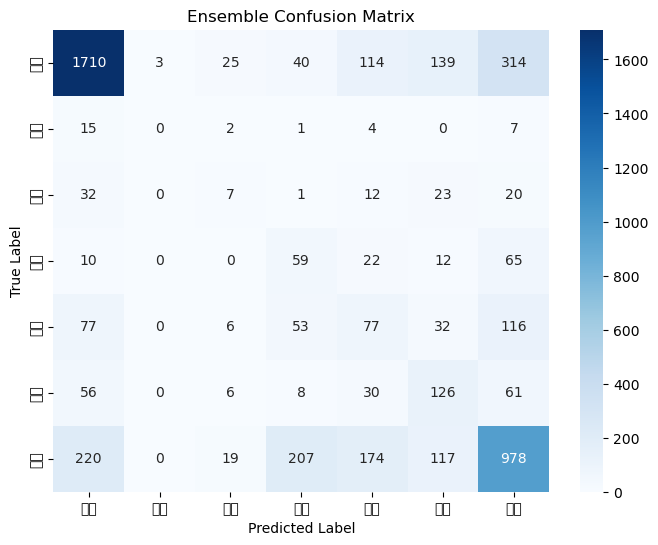

              precision    recall  f1-score   support

          분노       0.81      0.73      0.77      2345
          혐오       0.00      0.00      0.00        29
          공포       0.11      0.07      0.09        95
          기쁨       0.16      0.35      0.22       168
          슬픔       0.18      0.21      0.19       361
          놀람       0.28      0.44      0.34       287
          중립       0.63      0.57      0.60      1715

    accuracy                           0.59      5000
   macro avg       0.31      0.34      0.32      5000
weighted avg       0.63      0.59      0.61      5000



In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# ✅ 각 모델 예측값 얻기 (앙상블)
ensemble_predictions = np.zeros((len(X_test), 7))  # 클래스가 7개라 가정

# 모든 모델 예측값 누적
for model in ensemble_models:
    ensemble_predictions += model.predict(X_test)

# ✅ 앙상블 예측값 계산 (Soft Voting: 확률값 평균 후 최종 클래스 선정)
ensemble_predictions /= len(ensemble_models)
y_pred_classes = np.argmax(ensemble_predictions, axis=1)

# ✅ 실제 라벨
y_true = y_test  # 이미 numpy array 형태라면 그대로 사용하면 됨

# ✅ FER2013 기준 class_labels 설정
class_labels = ["분노", "혐오", "공포", "기쁨", "슬픔", "놀람", "중립"]

# ✅ 혼동 행렬 생성
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# ✅ 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Ensemble Confusion Matrix")
plt.show()

# ✅ 추가 평가 보고서 출력 (Precision, Recall, F1-score 확인)
report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print(report)

Matthews Correlation Coefficient (MCC): 0.3912
Cohen's Kappa Score: 0.3808


/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54800 (\N{HANGUL SYLLABLE HYEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/mambaforge/bas

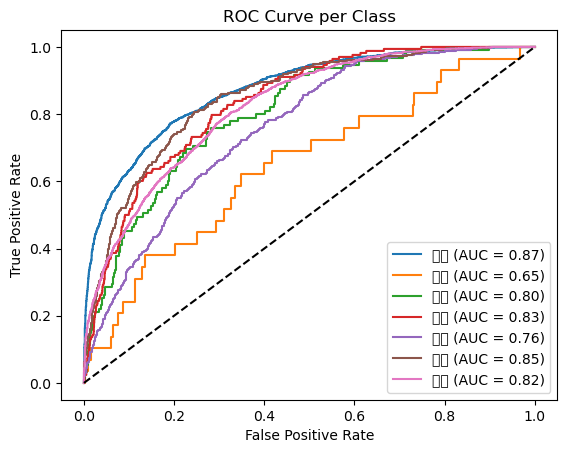

In [44]:
from sklearn.metrics import matthews_corrcoef, cohen_kappa_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# 기존에 정의된 변수: y_true, y_pred_classes, ensemble_predictions
class_labels = ["분노", "혐오", "공포", "기쁨", "슬픔", "놀람", "중립"]

# 1️⃣ Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_true, y_pred_classes)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

# 2️⃣ Cohen's Kappa Score
kappa = cohen_kappa_score(y_true, y_pred_classes)
print(f"Cohen's Kappa Score: {kappa:.4f}")

# 3️⃣ ROC Curve & AUC (클래스별로 확인)
y_true_bin = label_binarize(y_true, classes=[0,1,2,3,4,5,6])

# 클래스별 ROC 및 AUC 계산
for i, label in enumerate(class_labels):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], ensemble_predictions[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve per Class')
plt.legend(loc='lower right')
plt.show()

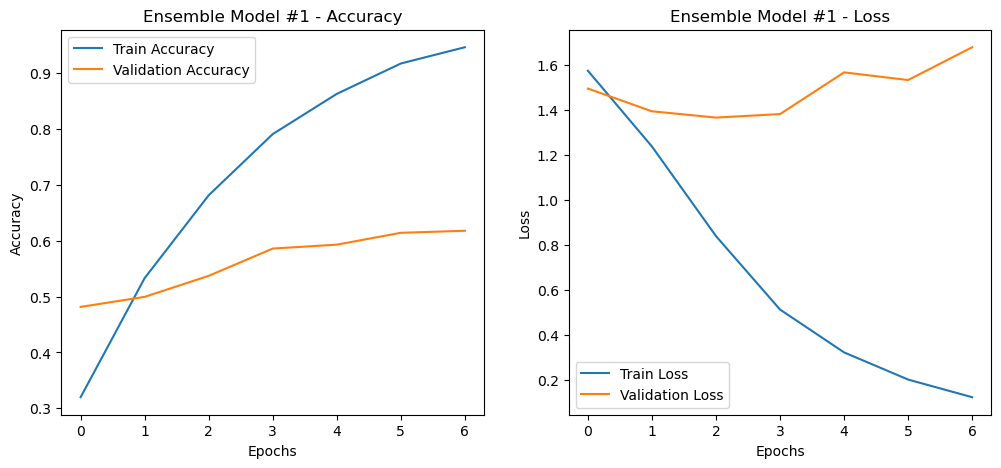

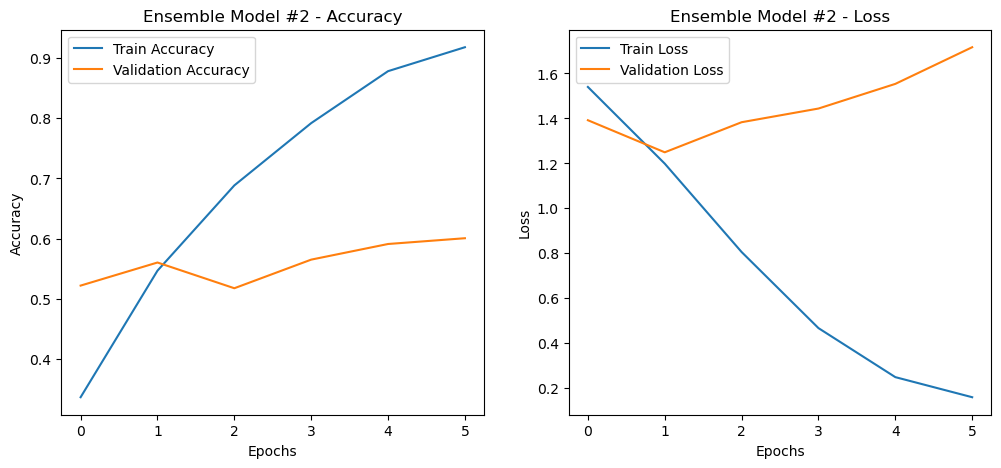

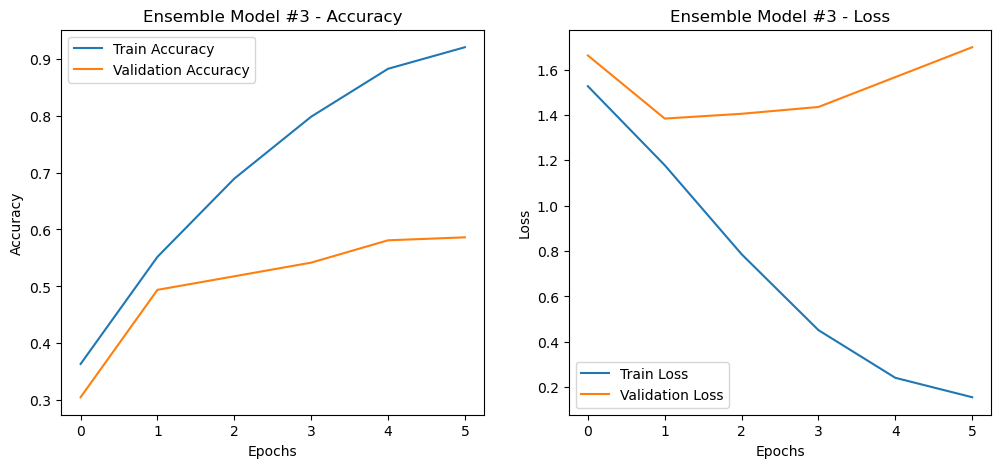

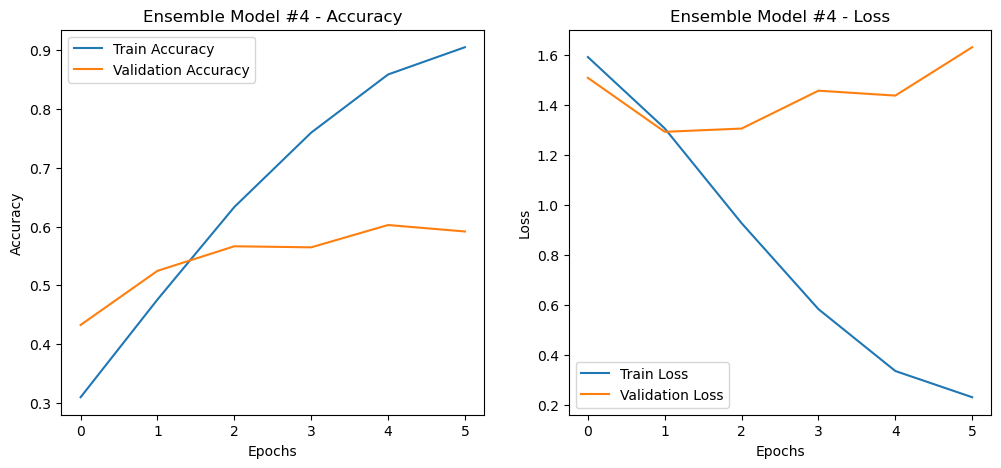

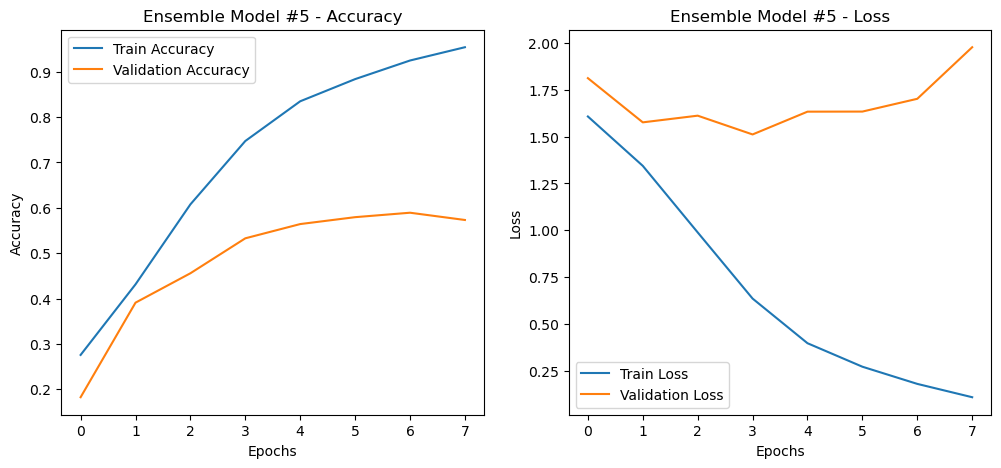

In [67]:
import matplotlib.pyplot as plt

# ✅ 학습 결과 시각화 함수
def plot_training_history(history, title="Model Training History"):
    plt.figure(figsize=(12, 5))

    # 🔹 정확도 그래프
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title(f"{title} - Accuracy")
    plt.legend()

    # 🔹 손실 그래프
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"{title} - Loss")
    plt.legend()

    plt.show()

# ✅ 모든 앙상블 모델의 학습 결과를 한 번에 시각화
for idx, history in enumerate(histories):
    plot_training_history(history, f"Ensemble Model #{idx+1}")